<img src=https://audiovisuales.icesi.edu.co/assets/custom/images/ICESI_logo_prin_descriptor_RGB_POSITIVO_0924.jpg width=200>


Integrantes: 

*Felipe Guerra, Eng.*

*Mavelyn Sterling, Eng.*

![indepensim inputs.jpg](<attachment:indepensim inputs.jpg>)
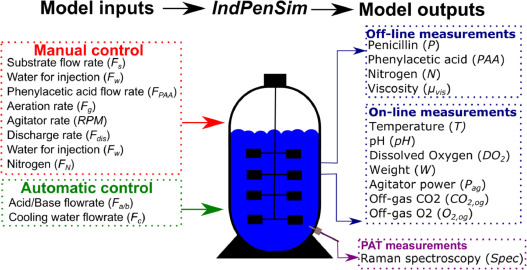

### **Contexto**  

El conjunto de datos fue generado mediante **IndPenSim**, una simulaci√≥n matem√°tica avanzada de un sistema de fermentaci√≥n de penicilina de 100,000 litros. IndPenSim es la primera simulaci√≥n que incorpora un dispositivo de espectroscopia Raman simulado para el desarrollo y evaluaci√≥n de soluciones de control avanzadas en biotecnolog√≠a.  

El conjunto de datos generado contiene **100 lotes** con mediciones detalladas del proceso y espectroscopia Raman (~2.5 GB), siendo ideal para an√°lisis de big data, aprendizaje autom√°tico (ML) e inteligencia artificial (AI) en la industria biofarmac√©utica.  

Los lotes se controlan con diferentes estrategias de control y duraciones t√≠picas de manufactura biofarmac√©utica:  
- **Lotes 1-30**: Controlados mediante un enfoque basado en recetas.  
- **Lotes 31-60**: Controlados por operadores.  
- **Lotes 61-90**: Controlados mediante un sistema de Control Avanzado de Procesos (APC) utilizando espectroscopia Raman.  
- **Lotes 91-100**: Contienen fallos que resultan en desviaciones del proceso.

# Instalar librerias

In [5]:
%pip install jupyter numpy pandas matplotlib seaborn scikit-learn tensorflow torch 


Note: you may need to restart the kernel to use updated packages.


# Cargar librer√≠as necesarias

In [6]:

import numpy as np  
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


## Cargar los datos

In [7]:

# Ruta del archivo CSV 
dataset_path = r"C:\Users\mavel\Downloads\GitHub\proyecto_reto_insulina_INRAE\data\100_Batches_IndPenSim_V3.csv"


dataset = pd.read_csv(dataset_path)
# Mostrar las primeras filas del dataset
dataset.head()


Time (h)  Aeration rate(Fg:L/h)  Agitator RPM(RPM:RPM)  \
0       0.2                     30                    100   
1       0.4                     30                    100   
2       0.6                     30                    100   
3       0.8                     30                    100   
4       1.0                     30                    100   

   Sugar feed rate(Fs:L/h)  Acid flow rate(Fa:L/h)  Base flow rate(Fb:L/h)  \
0                        8                  0.0000                  30.118   
1                        8                  0.0000                  51.221   
2                        8                  0.0000                  54.302   
3                        8                  0.0000                  37.816   
4                        8                  0.5181                  18.908   

   Heating/cooling water flow rate(Fc:L/h)  Heating water flow rate(Fh:L/h)  \
0                                   9.8335                           0.0001   
1                                  18.1550                           0.0001   
2                                   9.5982                           0.0001   
3                                   4.3395                           0.0001   
4                                   1.1045                           0.0001   

   Water for injection/dilution(Fw:L/h)  Air head pressure(pressure:bar)  ...  \
0                                     0                              0.6  ...   
1                                     0                              0.6  ...   
2                                     0                              0.6  ...   
3                                     0                              0.6  ...   
4                                     0                              0.6  ...   

   210  209  208  207  206  205  204  203  202  201  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  NaN  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  NaN  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  NaN  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  NaN  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  NaN  

[5 rows x 2239 columns]

## An√°lisis exploratorio

In [8]:
# Informaci√≥n general
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113935 entries, 0 to 113934
Columns: 2239 entries, Time (h) to 201
dtypes: float64(2225), int64(14)
memory usage: 1.9 GB


In [9]:
# Estad√≠stica descriptiva
dataset.describe()

Time (h)  Aeration rate(Fg:L/h)  Agitator RPM(RPM:RPM)  \
count  113935.000000          113935.000000               113935.0   
mean      114.750656              65.246360                  100.0   
std        66.990504              11.690215                    0.0   
min         0.200000              20.000000                  100.0   
25%        57.000000              60.000000                  100.0   
50%       114.000000              65.000000                  100.0   
75%       171.000000              75.000000                  100.0   
max       290.000000              75.000000                  100.0   

       Sugar feed rate(Fs:L/h)  Acid flow rate(Fa:L/h)  \
count            113935.000000           113935.000000   
mean                 76.663764                0.073209   
std                  25.680134                0.552788   
min                   2.000000                0.000000   
25%                  72.000000                0.000000   
50%                  80.000000                0.000000   
75%                  90.000000                0.000000   
max                 150.000000               12.996000   

       Base flow rate(Fb:L/h)  Heating/cooling water flow rate(Fc:L/h)  \
count           113935.000000                            113935.000000   
mean                61.334389                                74.346341   
std                 44.972713                               108.022600   
min                  0.000000                                 0.000100   
25%                 35.766000                                11.157000   
50%                 55.407000                                34.384000   
75%                 76.271500                                94.904500   
max                225.000000                              1500.000000   

       Heating water flow rate(Fh:L/h)  Water for injection/dilution(Fw:L/h)  \
count                    113935.000000                         113935.000000   
mean                         20.763025                            154.811954   
std                          50.230266                            155.601474   
min                           0.000100                              0.000000   
25%                           0.000100                              0.000000   
50%                           0.159010                            100.000000   
75%                          11.640500                            250.000000   
max                        1500.000000                            500.000000   

       Air head pressure(pressure:bar)  ...           210           209  \
count                    113935.000000  ...  1.139350e+05  1.139350e+05   
mean                          0.945026  ...  1.414688e+06  1.422458e+06   
std                           0.134269  ...  6.561401e+05  6.569029e+05   
min                           0.600000  ...  0.000000e+00  0.000000e+00   
25%                           0.900000  ...  8.384900e+05  8.457550e+05   
50%                           0.900000  ...  1.421700e+06  1.429600e+06   
75%                           1.100000  ...  1.964700e+06  1.973100e+06   
max                           1.100000  ...  2.902800e+06  2.911800e+06   

                208           207           206           205           204  \
count  1.139350e+05  1.139350e+05  1.139350e+05  1.139350e+05  1.139350e+05   
mean   1.429568e+06  1.435311e+06  1.439196e+06  1.441100e+06  1.441329e+06   
std    6.576540e+05  6.583792e+05  6.590689e+05  6.597212e+05  6.603415e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    8.523800e+05  8.575200e+05  8.608000e+05  8.620850e+05  8.617850e+05   
50%    1.436700e+06  1.442500e+06  1.446400e+06  1.448400e+06  1.448600e+06   
75%    1.980800e+06  1.987100e+06  1.991500e+06  1.994100e+06  1.994900e+06   
max    2.920100e+06  2.927200e+06  2.932700e+06  2.936400e+06  2.938300e+06   

                203  202  201  
count  1.139350e+05  0.0  0.0  
mean   1.440539e+0


1. **Tiempo (h)**:
   - La variable "Time (h)" representa la duraci√≥n del proceso, con un promedio de **114.75 horas** y un rango que va de **0.2 a 290 horas**.
   - La desviaci√≥n est√°ndar de **66.99 horas** indica una variabilidad considerable en los tiempos de operaci√≥n.

2. **Tasa de aireaci√≥n (Aeration rate, Fg:L/h)**:
   - Promedio: **65.25 L/h**, con valores que oscilan entre **20 y 75 L/h**.
   - La distribuci√≥n es moderadamente concentrada, con un 50% de los valores entre **60 y 75 L/h**.

3. **Velocidad del agitador (Agitator RPM, RPM:RPM)**:
   - Valor constante de **100 RPM** en todas las mediciones, lo que sugiere que no ha habido variaciones en este par√°metro.

4. **Tasa de alimentaci√≥n de az√∫car (Sugar feed rate, Fs:L/h)**:
   - Promedio: **76.66 L/h**, con una variaci√≥n entre **2 y 150 L/h**.
   - Se observa una gran dispersi√≥n en los datos, ya que el 75% de los valores est√°n por debajo de **90 L/h**, pero el m√°ximo alcanza **150 L/h**.

5. **Flujo de √°cido (Acid flow rate, Fa:L/h)**:
   - Promedio: **0.073 L/h**, con una desviaci√≥n est√°ndar de **0.552 L/h**, lo que indica que la mayor√≠a de los valores son cercanos a **0**.
   - El valor m√°ximo de **12.996 L/h** sugiere picos inusuales en la adici√≥n de √°cido.

6. **Flujo de base (Base flow rate, Fb:L/h)**:
   - Media: **61.33 L/h**, con valores que oscilan entre **0 y 225 L/h**.
   - Aunque el m√≠nimo es **0**, el percentil 25 ya tiene valores significativos (**35.77 L/h**), indicando que hay una distribuci√≥n no uniforme del flujo de base.

7. **Flujo de agua de calentamiento/enfriamiento (Heating/cooling water flow rate, Fc:L/h)**:
   - Media: **74.35 L/h**, con valores entre **0.0001 y 1500 L/h**.
   - Se observa una gran dispersi√≥n en los datos, con un 75% de los valores por debajo de **94.9 L/h**, pero un m√°ximo extremo de **1500 L/h**.

8. **Flujo de agua de calentamiento (Heating water flow rate, Fh:L/h)**:
   - Promedio: **20.76 L/h**, con valores desde **0.0001 hasta 1500 L/h**.
   - La gran diferencia entre el percentil 50 (**0.159 L/h**) y el m√°ximo sugiere que hay picos de alto consumo en ciertas condiciones.

9. **Flujo de agua para inyecci√≥n/diluci√≥n (Water for injection/dilution, Fw:L/h)**:
   - Media: **154.81 L/h**, con valores entre **0 y 500 L/h**.
   - La mayor√≠a de los valores se concentran entre **0 y 250 L/h**, pero el m√°ximo sugiere casos de alta demanda de agua de diluci√≥n.

10. **Presi√≥n del cabezal de aire (Air head pressure, pressure:bar)**:
    - Media: **0.945 bar**, con valores entre **0.6 y 1.1 bar**.
    - La presi√≥n se mantiene relativamente estable, con una baja desviaci√≥n est√°ndar (**0.134 bar**), lo que sugiere que el sistema mantiene un control adecuado sobre esta variable.



In [10]:
#columnas
dataset.columns

#lista del nombre de las columnas
list(dataset.columns)

['Time (h)',
 'Aeration rate(Fg:L/h)',
 'Agitator RPM(RPM:RPM)',
 'Sugar feed rate(Fs:L/h)',
 'Acid flow rate(Fa:L/h)',
 'Base flow rate(Fb:L/h)',
 'Heating/cooling water flow rate(Fc:L/h)',
 'Heating water flow rate(Fh:L/h)',
 'Water for injection/dilution(Fw:L/h)',
 'Air head pressure(pressure:bar)',
 'Dumped broth flow(Fremoved:L/h)',
 'Substrate concentration(S:g/L)',
 'Dissolved oxygen concentration(DO2:mg/L)',
 'Penicillin concentration(P:g/L)',
 'Vessel Volume(V:L)',
 'Vessel Weight(Wt:Kg)',
 'pH(pH:pH)',
 'Temperature(T:K)',
 'Generated heat(Q:kJ)',
 'carbon dioxide percent in off-gas(CO2outgas:%)',
 'PAA flow(Fpaa:PAA flow (L/h))',
 'PAA concentration offline(PAA_offline:PAA (g L^{-1}))',
 'Oil flow(Foil:L/hr)',
 'NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))',
 'Oxygen Uptake Rate(OUR:(g min^{-1}))',
 'Oxygen in percent in off-gas(O2:O2  (%))',
 'Offline Penicillin concentration(P_offline:P(g L^{-1}))',
 'Offline Biomass concentratio(X_offline:X(g L^{-1}))',
 'Carbo

In [11]:
print(f"El dataset tiene {dataset.shape[1]} columnas.")
print("Nombres de las columnas:")
print(dataset.columns.tolist())  # Ver nombres de columnas

El dataset tiene 2239 columnas.
Nombres de las columnas:
['Time (h)', 'Aeration rate(Fg:L/h)', 'Agitator RPM(RPM:RPM)', 'Sugar feed rate(Fs:L/h)', 'Acid flow rate(Fa:L/h)', 'Base flow rate(Fb:L/h)', 'Heating/cooling water flow rate(Fc:L/h)', 'Heating water flow rate(Fh:L/h)', 'Water for injection/dilution(Fw:L/h)', 'Air head pressure(pressure:bar)', 'Dumped broth flow(Fremoved:L/h)', 'Substrate concentration(S:g/L)', 'Dissolved oxygen concentration(DO2:mg/L)', 'Penicillin concentration(P:g/L)', 'Vessel Volume(V:L)', 'Vessel Weight(Wt:Kg)', 'pH(pH:pH)', 'Temperature(T:K)', 'Generated heat(Q:kJ)', 'carbon dioxide percent in off-gas(CO2outgas:%)', 'PAA flow(Fpaa:PAA flow (L/h))', 'PAA concentration offline(PAA_offline:PAA (g L^{-1}))', 'Oil flow(Foil:L/hr)', 'NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))', 'Oxygen Uptake Rate(OUR:(g min^{-1}))', 'Oxygen in percent in off-gas(O2:O2  (%))', 'Offline Penicillin concentration(P_offline:P(g L^{-1}))', 'Offline Biomass concentratio(X_

## Selecci√≥n de variables

In [12]:
num_cols = min(36, dataset.shape[1])  # Asegurar que no seleccionemos m√°s columnas de las disponibles
df = dataset.iloc[:, :num_cols]

print(f"Se han seleccionado {num_cols} columnas para EDA.")
print(df.head())  # Mostrar las primeras filas

Se han seleccionado 36 columnas para EDA.
   Time (h)  Aeration rate(Fg:L/h)  Agitator RPM(RPM:RPM)  \
0       0.2                     30                    100   
1       0.4                     30                    100   
2       0.6                     30                    100   
3       0.8                     30                    100   
4       1.0                     30                    100   

   Sugar feed rate(Fs:L/h)  Acid flow rate(Fa:L/h)  Base flow rate(Fb:L/h)  \
0                        8                  0.0000                  30.118   
1                        8                  0.0000                  51.221   
2                        8                  0.0000                  54.302   
3                        8                  0.0000                  37.816   
4                        8                  0.5181                  18.908   

   Heating/cooling water flow rate(Fc:L/h)  Heating water flow rate(Fh:L/h)  \
0                                   9.8335 

In [13]:
print(f"El dataset tiene {df.shape[1]} columnas.")
print("Nombres de las columnas:")
print(df.columns.tolist())  # Ver nombres de columnas

El dataset tiene 36 columnas.
Nombres de las columnas:
['Time (h)', 'Aeration rate(Fg:L/h)', 'Agitator RPM(RPM:RPM)', 'Sugar feed rate(Fs:L/h)', 'Acid flow rate(Fa:L/h)', 'Base flow rate(Fb:L/h)', 'Heating/cooling water flow rate(Fc:L/h)', 'Heating water flow rate(Fh:L/h)', 'Water for injection/dilution(Fw:L/h)', 'Air head pressure(pressure:bar)', 'Dumped broth flow(Fremoved:L/h)', 'Substrate concentration(S:g/L)', 'Dissolved oxygen concentration(DO2:mg/L)', 'Penicillin concentration(P:g/L)', 'Vessel Volume(V:L)', 'Vessel Weight(Wt:Kg)', 'pH(pH:pH)', 'Temperature(T:K)', 'Generated heat(Q:kJ)', 'carbon dioxide percent in off-gas(CO2outgas:%)', 'PAA flow(Fpaa:PAA flow (L/h))', 'PAA concentration offline(PAA_offline:PAA (g L^{-1}))', 'Oil flow(Foil:L/hr)', 'NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))', 'Oxygen Uptake Rate(OUR:(g min^{-1}))', 'Oxygen in percent in off-gas(O2:O2  (%))', 'Offline Penicillin concentration(P_offline:P(g L^{-1}))', 'Offline Biomass concentratio(X_of

**Interpretaci√≥n de las variables**

1. **Time (h)**: Tiempo transcurrido en horas desde el inicio del proceso de fermentaci√≥n.

2. **Aeration rate (Fg:L/h)**: Tasa de aireaci√≥n en litros por hora, que controla la cantidad de ox√≠geno suministrado al biorreactor para mantener condiciones aer√≥bicas.

3. **Agitator RPM (RPM:RPM)**: Velocidad del agitador en revoluciones por minuto (RPM), utilizada para mezclar el medio de cultivo y mejorar la transferencia de ox√≠geno y nutrientes.

4. **Sugar feed rate (Fs:L/h)**: Tasa de alimentaci√≥n de az√∫car en litros por hora, que proporciona la fuente de carbono necesaria para el crecimiento de los microorganismos y la producci√≥n de penicilina.

5. **Acid flow rate (Fa:L/h)**: Flujo de √°cido en litros por hora, utilizado para ajustar el pH del medio de cultivo.

6. **Base flow rate (Fb:L/h)**: Flujo de base en litros por hora, utilizado para contrarrestar la acidificaci√≥n del medio de cultivo y mantener el pH en un rango √≥ptimo.

7. **Heating/cooling water flow rate (Fc:L/h)**: Flujo de agua de calefacci√≥n o enfriamiento en litros por hora, que regula la temperatura dentro del biorreactor.

8. **Heating water flow rate (Fh:L/h)**: Flujo de agua caliente en litros por hora, que se usa para calentar el medio de cultivo.

9. **Water for injection/dilution (Fw:L/h)**: Agua utilizada para inyecci√≥n o diluci√≥n del medio de cultivo en litros por hora.

10. **Air head pressure (pressure:bar)**: Presi√≥n de aire en el cabezal del biorreactor en bares, que influye en la transferencia de ox√≠geno y la mezcla del medio.

11. **Dumped broth flow (Fremoved:L/h)**: Flujo de caldo retirado en litros por hora, indicando la cantidad de l√≠quido que se extrae del biorreactor, posiblemente como parte de un proceso de purga o cosecha.

12. **Substrate concentration (S:g/L)**: Concentraci√≥n de sustrato (az√∫car o fuente de carbono) en gramos por litro, que es utilizado por los microorganismos para su metabolismo.

13. **Dissolved oxygen concentration (DO2:mg/L)**: Concentraci√≥n de ox√≠geno disuelto en miligramos por litro, crucial para el crecimiento y metabolismo de los microorganismos productores de penicilina.

14. **Penicillin concentration (P:g/L)**: Concentraci√≥n de penicilina en gramos por litro, indicando la cantidad de producto generado en el proceso.

15. **Vessel Volume (V:L)**: Volumen del biorreactor en litros, que puede variar debido a la adici√≥n de l√≠quidos o eliminaci√≥n de caldo fermentado.

16. **Vessel Weight (Wt:Kg)**: Peso del biorreactor en kilogramos, que depende del volumen y la densidad del medio de cultivo.

17. **pH (pH:pH)**: pH del medio de cultivo, fundamental para el crecimiento √≥ptimo de los microorganismos y la producci√≥n de penicilina.

18. **Temperature (T:K)**: Temperatura del medio de cultivo en Kelvin, que afecta la tasa de crecimiento microbiano y la producci√≥n de penicilina.

19. **Generated heat (Q:kJ)**: Cantidad de calor generado en el proceso de fermentaci√≥n en kilojulios, que puede indicar la actividad metab√≥lica de los microorganismos.

20. **Carbon dioxide percent in off-gas (CO2outgas:%)**: Porcentaje de di√≥xido de carbono en el gas de salida, que refleja la tasa de respiraci√≥n microbiana.

21. **PAA flow (Fpaa:L/h)**: Flujo de √°cido perac√©tico en litros por hora, un agente oxidante utilizado para controlar la contaminaci√≥n y mejorar la producci√≥n.

22. **PAA concentration offline (PAA_offline:g/L)**: Concentraci√≥n de √°cido perac√©tico medida fuera de l√≠nea en gramos por litro.

23. **Oil flow (Foil:L/h)**: Flujo de aceite en litros por hora, que puede usarse como fuente de carbono o para controlar la espuma en el biorreactor.

24. **NH‚ÇÉ concentration offline (NH3_offline:g/L)**: Concentraci√≥n de amon√≠aco medida fuera de l√≠nea en gramos por litro, utilizada para controlar el balance de nitr√≥geno en el medio de cultivo.

25. **Oxygen Uptake Rate (OUR:g/min)**: Tasa de consumo de ox√≠geno en gramos por minuto, que indica la actividad metab√≥lica de los microorganismos.

26. **Oxygen in percent in off-gas (O2:%)**: Porcentaje de ox√≠geno en el gas de salida, que ayuda a evaluar la eficiencia de la transferencia de ox√≠geno en el biorreactor.

27. **Offline Penicillin concentration (P_offline:g/L)**: Concentraci√≥n de penicilina medida fuera de l√≠nea en gramos por litro, usada para calibrar mediciones en l√≠nea.

28. **Offline Biomass concentration (X_offline:g/L)**: Concentraci√≥n de biomasa medida fuera de l√≠nea en gramos por litro, indicando la cantidad de microorganismos en el medio.

29. **Carbon evolution rate (CER:g/h)**: Tasa de evoluci√≥n de carbono en gramos por hora, reflejando la actividad metab√≥lica y la conversi√≥n de sustratos en di√≥xido de carbono.

30. **Ammonia shots (NH3_shots:kgs)**: Cantidad de inyecciones de amon√≠aco en kilogramos, usada para ajustar la concentraci√≥n de nitr√≥geno en el medio.

31. **Viscosity (Viscosity_offline:centPoise)**: Viscosidad del medio de cultivo medida fuera de l√≠nea en centipoises, que afecta la transferencia de ox√≠geno y la mezcla del biorreactor.

32. **Fault reference (Fault_ref:Fault ref)**: Referencia de fallas en el sistema, posiblemente utilizada para monitoreo y control del proceso.

33. **0 - Recipe driven 1 - Operator controlled (Control_ref:Control ref)**: Variable que indica si el proceso est√° siendo controlado por una receta automatizada (0) o por un operador manualmente (1).

34. **1- No Raman spec**: Indica si no se ha utilizado espectroscopia Raman en el monitoreo del proceso.

35. **1-Raman spec recorded**: Indica si se ha registrado datos de espectroscopia Raman.

36. **2-PAT control (PAT_ref:PAT ref)**: Indica si se est√° utilizando control de Proceso Anal√≠tico Tecnol√≥gico (PAT) para optimizar el proceso de fermentaci√≥n.



### Correlaci√≥n

c:\Users\mavel\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\mavel\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


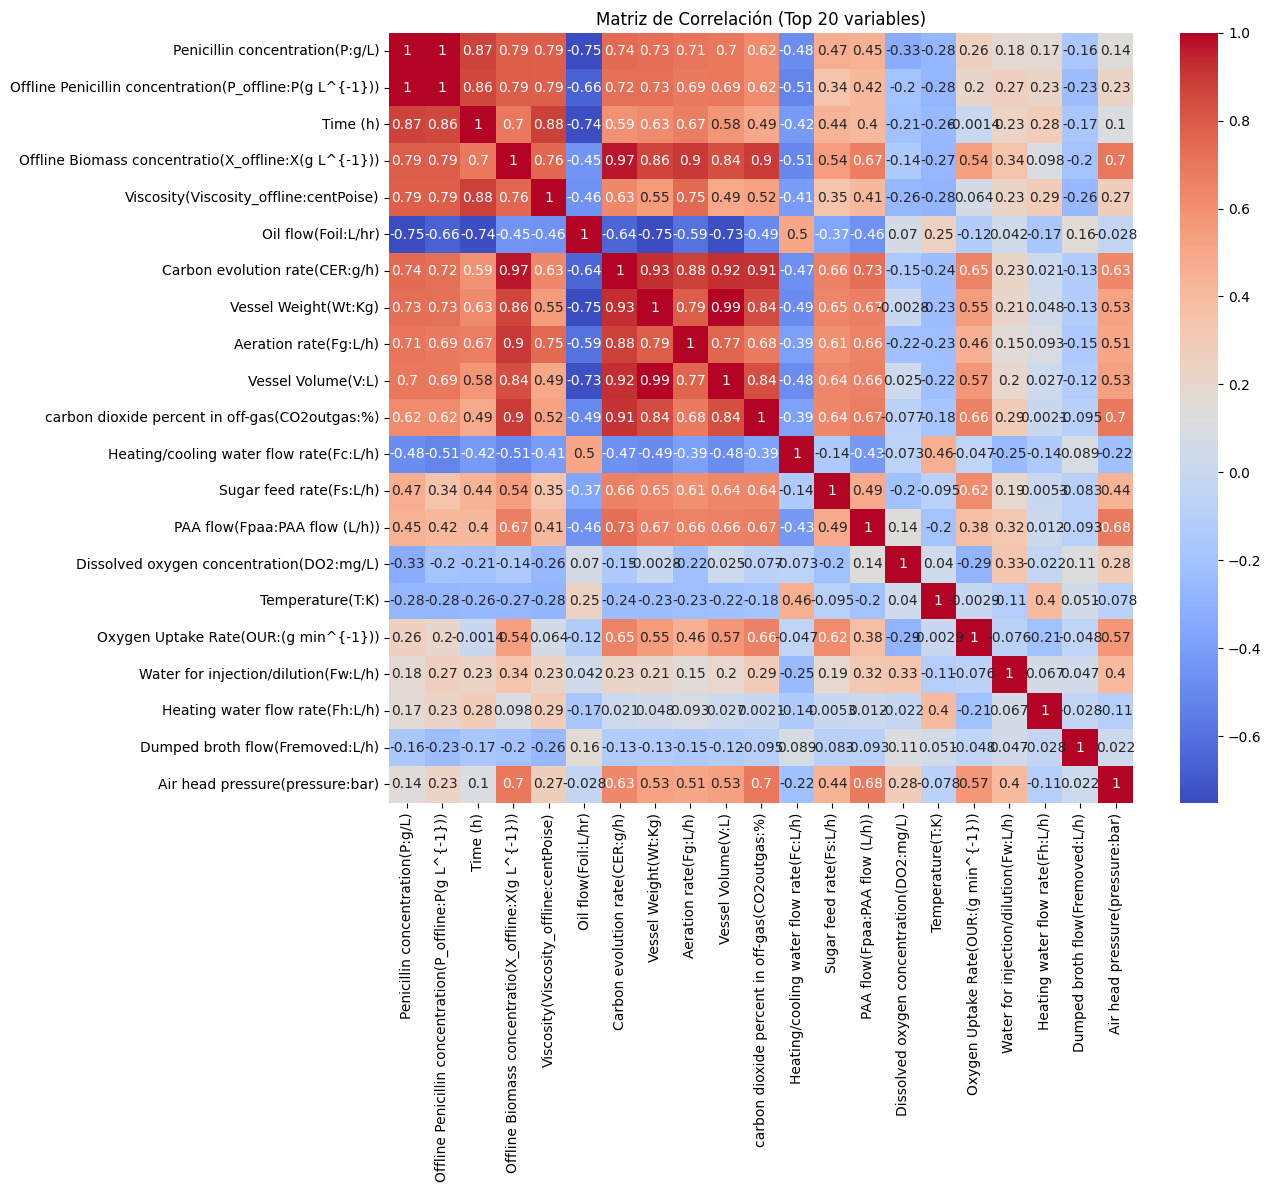

Variables seleccionadas: ['Penicillin concentration(P:g/L)', 'Offline Penicillin concentration(P_offline:P(g L^{-1}))', 'Time (h)', 'Offline Biomass concentratio(X_offline:X(g L^{-1}))', 'Viscosity(Viscosity_offline:centPoise)', 'Oil flow(Foil:L/hr)', 'Carbon evolution rate(CER:g/h)', 'Vessel Weight(Wt:Kg)', 'Aeration rate(Fg:L/h)', 'Vessel Volume(V:L)', 'carbon dioxide percent in off-gas(CO2outgas:%)', 'Heating/cooling water flow rate(Fc:L/h)', 'Sugar feed rate(Fs:L/h)', 'PAA flow(Fpaa:PAA flow (L/h))', 'Dissolved oxygen concentration(DO2:mg/L)', 'Temperature(T:K)', 'Oxygen Uptake Rate(OUR:(g min^{-1}))', 'Water for injection/dilution(Fw:L/h)', 'Heating water flow rate(Fh:L/h)', 'Dumped broth flow(Fremoved:L/h)', 'Air head pressure(pressure:bar)']


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def select_top_correlated_features(df, target_variable, top_n=20):
    # Calcular correlaciones individuales con la variable objetivo
    correlations = df.corrwith(df[target_variable]).abs().sort_values(ascending=False)

    # Seleccionar las top_n variables m√°s correlacionadas (incluyendo la variable objetivo)
    top_features = correlations.head(top_n + 1).index.tolist()

    # Crear dataset reducido
    reduced_dataset = df[top_features]

    # Mostrar matriz de correlaci√≥n solo con las variables seleccionadas
    plt.figure(figsize=(12, 10))
    sns.heatmap(reduced_dataset.corr(), cmap='coolwarm', annot=True)
    plt.title('Matriz de Correlaci√≥n (Top 20 variables)')
    plt.show()

    print(f"Variables seleccionadas: {top_features}")

    return reduced_dataset


target_variable = "Penicillin concentration(P:g/L)"
df = select_top_correlated_features(df, target_variable)


**Interpretaci√≥n del mapa de calor**
- **Rojo oscuro (correlaci√≥n fuerte, >0.7):** Variables que aumentan junto con la producci√≥n de penicilina.
- **Rojo medio (correlaci√≥n moderada, 0.4 a 0.7):** Variables con impacto relevante pero no determinante.
- **Blanco o gris (correlaci√≥n d√©bil, entre -0.4 y 0.4):** Variables sin una relaci√≥n clara con la penicilina.
- **Azul oscuro (correlaci√≥n negativa fuerte, < -0.4):** Variables que disminuyen cuando la producci√≥n de penicilina aumenta.

---

**1. Variables con correlaci√≥n positiva fuerte con la Penicilina (Rojo oscuro, cercanas a 1)**  
Estas variables est√°n fuertemente relacionadas con el aumento en la producci√≥n de penicilina.

| **Variable** | **Correlaci√≥n con Penicillin concentration (P:g/L)** | **Interpretaci√≥n** |
|-------------|-----------------------------------------------------|-------------------|
| **Offline Penicillin concentration (P_offline:P g/L‚Åª¬π)** | **1.00** | Es la misma variable medida en diferentes condiciones (online vs offline). |
| **Time (h)** | **0.87** | A medida que avanza la fermentaci√≥n, la producci√≥n de penicilina aumenta. |
| **Offline Biomass concentration (X_offline:X g/L‚Åª¬π)** | **0.79** | Un mayor crecimiento celular favorece la producci√≥n de penicilina. |
| **Viscosity (Viscosity_offline:centPoise)** | **0.79** | La viscosidad del medio aumenta junto con la biomasa y la producci√≥n de penicilina. |
| **Carbon evolution rate (CER:g/h)** | **0.74** | La producci√≥n de CO‚ÇÇ indica un metabolismo celular activo, clave en la s√≠ntesis de penicilina. |
| **Aeration rate (Fg:L/h)** | **0.71** | Una mayor aireaci√≥n favorece la oxigenaci√≥n del medio, necesaria para la fermentaci√≥n. |
| **Vessel Weight (Wt:Kg)** | **0.70** | El peso del biorreactor refleja el aumento en biomasa y producto acumulado. |

 **Conclusi√≥n:** **El tiempo de fermentaci√≥n, la biomasa, la viscosidad del medio y la producci√≥n de CO‚ÇÇ est√°n estrechamente ligados a la producci√≥n de penicilina.**  

---

**2. Variables con correlaci√≥n moderada con la Penicilina (Rojo medio, 0.4 a 0.7)**
Estas variables tienen un impacto relevante en la producci√≥n de penicilina.

| **Variable** | **Correlaci√≥n con Penicillin concentration (P:g/L)** | **Interpretaci√≥n** |
|-------------|-----------------------------------------------------|-------------------|
| **carbon dioxide percent in off-gas (CO‚ÇÇoutgas:%)** | **0.62** | Una alta producci√≥n de CO‚ÇÇ sugiere una alta actividad metab√≥lica. |
| **Sugar feed rate (Fs:L/h)** | **0.47** | El suministro de az√∫car proporciona la energ√≠a necesaria para la s√≠ntesis de penicilina. |
| **PAA flow (Fpaa:L/h)** | **0.45** | La adici√≥n de PAA est√° relacionada con el control del proceso y su optimizaci√≥n. |

**Conclusi√≥n:** **El ox√≠geno, el flujo de PAA y la alimentaci√≥n de az√∫car favorecen la producci√≥n de penicilina, aunque no de manera tan determinante como el crecimiento de biomasa y el tiempo de fermentaci√≥n.**  

---

**3. Variables con correlaci√≥n d√©bil con la Penicilina (Blanco o gris, entre -0.4 y 0.4)**
Estas variables no tienen una relaci√≥n clara con la producci√≥n de penicilina.

| **Variable** | **Correlaci√≥n con Penicillin concentration (P:g/L)** | **Interpretaci√≥n** |
|-------------|-----------------------------------------------------|-------------------|
| **Oxygen Uptake Rate (OUR:g/min)** | **0.26** | Un metabolismo m√°s activo puede aumentar la producci√≥n, pero la relaci√≥n no es fuerte. |
| **Water for injection/dilution (Fw:L/h)** | **0.18** | La cantidad de agua a√±adida para diluci√≥n no parece estar fuertemente ligada a la producci√≥n de penicilina. |
| **Heating water flow rate (Fh:L/h)** | **0.17** | La cantidad de agua caliente usada en el proceso no influye directamente en la producci√≥n de penicilina. |
| **Air head pressure (pressure:bar)** | **0.14** | La presi√≥n de aire no parece ser un factor cr√≠tico en la s√≠ntesis de penicilina. |

**Conclusi√≥n:** **Estas variables pueden influir en otros aspectos del proceso, pero no son determinantes en la producci√≥n de penicilina.**

---

**4. Variables con correlaci√≥n negativa con la Penicilina (Azul oscuro, < -0.4)**
Estas variables disminuyen cuando la producci√≥n de penicilina aumenta.

| **Variable** | **Correlaci√≥n con Penicillin concentration (P:g/L)** | **Interpretaci√≥n** |
|-------------|-----------------------------------------------------|-------------------|
| **Heating/cooling water flow rate (Fc:L/h)** | **-0.48** | Un mayor flujo de agua de enfriamiento puede indicar fluctuaciones de temperatura que afectan la fermentaci√≥n. |
| **Dissolved oxygen concentration (DO‚ÇÇ:mg/L)** | **-0.33** | Un exceso de ox√≠geno disuelto podr√≠a indicar una menor actividad metab√≥lica. |
| **Temperature (T:K)** | **-0.28** | Fluctuaciones en la temperatura pueden afectar negativamente la estabilidad de los microorganismos. |

 **Conclusi√≥n:** **El control de la temperatura y del flujo de agua de enfriamiento es crucial para evitar impactos negativos en la producci√≥n de penicilina. Un exceso de ox√≠geno disuelto tambi√©n puede ser perjudicial.**

---

 **5. Resumen Final**
- **Variables clave para aumentar la producci√≥n de penicilina (rojo oscuro, fuerte correlaci√≥n positiva):**  
  - **Tiempo de fermentaci√≥n, biomasa, viscosidad del medio y producci√≥n de CO‚ÇÇ.**
- **Variables secundarias pero importantes (rojo medio, moderada correlaci√≥n positiva):**  
  - **Tasa de aireaci√≥n, alimentaci√≥n de az√∫car y flujo de PAA.**
- **Variables con baja influencia (blanco o gris, correlaci√≥n d√©bil):**  
  - **Tasa de consumo de ox√≠geno (OUR), flujo de agua de diluci√≥n e inyecci√≥n.**
- **Factores que pueden afectar negativamente la producci√≥n (azul oscuro, correlaci√≥n negativa):**  
  - **Fluctuaciones en temperatura y flujo de agua de enfriamiento, as√≠ como un exceso de ox√≠geno disuelto.**

---

**6. Recomendaciones para Optimizar la Producci√≥n de Penicilina**
1. **Maximizar el crecimiento de biomasa y la aireaci√≥n sin sobresaturar el ox√≠geno.**  
2. **Regular la temperatura y el flujo de agua de enfriamiento para evitar fluctuaciones.**  
3. **Controlar el flujo de az√∫car y la evoluci√≥n de CO‚ÇÇ como indicadores del metabolismo celular.**  
4. **Asegurar un suministro adecuado de ox√≠geno, sin llegar a niveles de inhibici√≥n.**  




## Encontrar los lotes

In [15]:

# Funci√≥n para encontrar los √≠ndices de inicio de los lotes
def find_batch_start_indices(df, time_value=0.2):
    return df[df['Time (h)'] == time_value].index

# Funci√≥n para encontrar los √≠ndices de finalizaci√≥n de los lotes
def find_batch_end_indices(df, time_value=0.2):
    batch_start_indices = find_batch_start_indices(df, time_value)
    batch_end_indices = batch_start_indices - 1
    batch_end_indices = batch_end_indices[batch_end_indices >= 0]
    batch_end_indices = batch_end_indices.append(pd.Index([df.index[-1]]))
    return batch_end_indices

# Detectar los lotes
batch_start_indices = find_batch_start_indices(df)
batch_end_indices = find_batch_end_indices(df)

# Crear un diccionario para almacenar los DataFrames de cada batch
batch_dataframes = {}
batch_number = 1

for start, end in zip(batch_start_indices, batch_end_indices):
    batch_dataframes[batch_number] = df.iloc[start:end].copy()
    batch_number += 1

# Mostrar cu√°ntos batches fueron detectados
print(f"Se han detectado {len(batch_dataframes)} batches en el dataset.")

# Mostrar las primeras filas de un batch espec√≠fico (ejemplo: batch 1)
batch_dataframes[1].head()


Se han detectado 100 batches en el dataset.


Penicillin concentration(P:g/L)  \
0                     1.017800e-25   
1                     1.000000e-03   
2                     9.993400e-04   
3                     9.987400e-04   
4                     9.982100e-04   

   Offline Penicillin concentration(P_offline:P(g L^{-1}))  Time (h)  \
0                                                NaN             0.2   
1                                                NaN             0.4   
2                                                NaN             0.6   
3                                                NaN             0.8   
4                                       1.017800e-25             1.0   

   Offline Biomass concentratio(X_offline:X(g L^{-1}))  \
0                                                NaN     
1                                                NaN     
2                                                NaN     
3                                                NaN     
4                                            0.52808     

   Viscosity(Viscosity_offline:centPoise)  Oil flow(Foil:L/hr)  \
0                                     NaN                   22   
1                                     NaN                   22   
2                                     NaN                   22   
3                                     NaN                   22   
4                                   4.083                   22   

   Carbon evolution rate(CER:g/h)  Vessel Weight(Wt:Kg)  \
0                        0.034045               62574.0   
1                        0.038702               62585.0   
2                        0.040240               62598.0   
3                        0.041149               62607.0   
4                        0.041951               62613.0   

   Aeration rate(Fg:L/h)  Vessel Volume(V:L)  ...  \
0                     30               58479  ...   
1                     30               58487  ...   
2                     30               58495  ...   
3                     30               58499  ...   
4                     30               58501  ...   

   Heating/cooling water flow rate(Fc:L/h)  Sugar feed rate(Fs:L/h)  \
0                                   9.8335                        8   
1                                  18.1550                        8   
2                                   9.5982                        8   
3                                   4.3395                        8   
4                                   1.1045                        8   

   PAA flow(Fpaa:PAA flow (L/h))  Dissolved oxygen concentration(DO2:mg/L)  \
0                            5.0                                    14.711   
1                            5.0                                    14.699   
2                            5.0                                    14.686   
3                            5.0                                    14.661   
4                            5.0                                    14.633   

   Temperature(T:K)  Oxygen Uptake Rate(OUR:(g min^{-1}))  \
0            298.22                              0.480510   
1            298.17                              0.058147   
2            298.14                             -0.041505   
3            298.11                             -0.056737   
4            298.09                             -0.049975   

   Water for injection/dilution(Fw:L/h)  Heating water flow rate(Fh:L/h)  \
0                                     0                           0.0001   
1                                     0                           0.0001   
2                                     0                           0.0001   
3                                     0                           0.0001   
4                                     0                           0.0001   

   Dumped broth flow(Fremoved:L/h)  Air head pressure(pressure:bar)  
0                                0                              0.6  
1                                0                           

## Procesar el lote especifico

### Lote 1

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

def preprocess_batch(batch_num, batch_dataframes):
    """
    Preprocesa un batch espec√≠fico: manejo de valores nulos y normalizaci√≥n.

    Args:
        batch_num (int): N√∫mero del batch a procesar.
        batch_dataframes (dict): Diccionario con los DataFrames de cada batch.

    Returns:
        pd.DataFrame: DataFrame preprocesado del batch seleccionado.
    """
    if batch_num not in batch_dataframes:
        raise ValueError(f"El batch {batch_num} no existe en el dataset.")

    batch_df = batch_dataframes[batch_num]

    # Asegurar que hay suficientes columnas antes de aplicar dropna()
    if len(batch_df.columns) > 1:
        batch_clean = batch_df.dropna(thresh=len(batch_df) * 0.5, axis=1)
    else:
        batch_clean = batch_df.copy()

    # Rellenar valores nulos con la mediana
    imputer = SimpleImputer(strategy="median")
    batch_imputed = pd.DataFrame(imputer.fit_transform(batch_clean), columns=batch_clean.columns)

    # Normalizar los datos (excluir "Time (h)")
    if "Time (h)" in batch_imputed.columns:
        features = batch_imputed.drop(columns=["Time (h)"])
    else:
        features = batch_imputed

    scaler = StandardScaler()
    batch_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

    # Agregar nuevamente la columna "Time (h)" despu√©s del escalado si existe
    if "Time (h)" in batch_clean.columns:
        batch_scaled["Time (h)"] = batch_clean["Time (h)"].values

    print(f"Batch {batch_num} preprocesado correctamente.")
    return batch_scaled

# üîπ Selecciona el batch que deseas analizar
batch_id = 1  
preprocessed_batch = preprocess_batch(batch_id, batch_dataframes)

# Mostrar las primeras filas del batch procesado
preprocessed_batch.head()


Batch 1 preprocesado correctamente.


Penicillin concentration(P:g/L)  Oil flow(Foil:L/hr)  \
0                        -1.440808             -0.88251   
1                        -1.440711             -0.88251   
2                        -1.440711             -0.88251   
3                        -1.440711             -0.88251   
4                        -1.440712             -0.88251   

   Carbon evolution rate(CER:g/h)  Vessel Weight(Wt:Kg)  \
0                       -2.525055             -1.958402   
1                       -2.515634             -1.957210   
2                       -2.512523             -1.955802   
3                       -2.510684             -1.954827   
4                       -2.509062             -1.954177   

   Aeration rate(Fg:L/h)  Vessel Volume(V:L)  \
0              -3.054375           -1.865698   
1              -3.054375           -1.864662   
2              -3.054375           -1.863626   
3              -3.054375           -1.863108   
4              -3.054375           -1.862849   

   carbon dioxide percent in off-gas(CO2outgas:%)  \
0                                       -2.930050   
1                                       -2.904017   
2                                       -2.895428   
3                                       -2.890348   
4                                       -2.885862   

   Heating/cooling water flow rate(Fc:L/h)  Sugar feed rate(Fs:L/h)  \
0                                -0.870769                 -2.86057   
1                                -0.721788                 -2.86057   
2                                -0.874981                 -2.86057   
3                                -0.969128                 -2.86057   
4                                -1.027045                 -2.86057   

   PAA flow(Fpaa:PAA flow (L/h))  Dissolved oxygen concentration(DO2:mg/L)  \
0                      -0.693025                                  1.446615   
1                      -0.693025                                  1.438939   
2                      -0.693025                                  1.430624   
3                      -0.693025                                  1.414632   
4                      -0.693025                                  1.396721   

   Temperature(T:K)  Oxygen Uptake Rate(OUR:(g min^{-1}))  \
0          2.402225                             -2.184271   
1          1.826062                             -3.273220   
2          1.480365                             -3.530146   
3          1.134667                             -3.569418   
4          0.904203                             -3.551984   

   Water for injection/dilution(Fw:L/h)  Heating water flow rate(Fh:L/h)  \
0                             -0.993758                        -0.391495   
1                             -0.993758                        -0.391495   
2                             -0.993758                        -0.391495   
3                             -0.993758                        -0.391495   
4                             -0.993758                        -0.391495   

   Dumped broth flow(Fremoved:L/h)  Air head pressure(pressure:bar)  Time (h)  
0                         0.236912                        -2.562356       0.2  
1                         0.236912                        -2.562356       0.4  
2                         0.236912                        -2.562356       0.6  
3                         0.236912                        -2.562356       0.8  
4                         0.236912                        -2.562356       1.0

#### An√°lisis de Componentes Principales

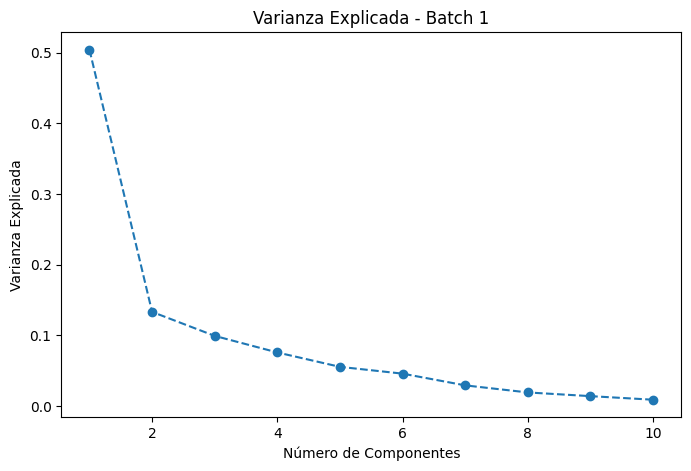

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def apply_pca(batch_df, n_components=10):
    """
    Aplica PCA a un DataFrame espec√≠fico.

    Args:
        batch_df (pd.DataFrame): DataFrame preprocesado del batch.
        n_components (int): N√∫mero de componentes principales a extraer.

    Returns:
        np.array: Componentes principales del batch.
        np.array: Varianza explicada por cada componente.
    """
    # Aplicar PCA sin incluir "Time (h)"
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(batch_df.drop(columns=["Time (h)"]))

    # Varianza explicada
    explained_variance = pca.explained_variance_ratio_

    # Graficar la varianza explicada
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
    plt.xlabel("N√∫mero de Componentes")
    plt.ylabel("Varianza Explicada")
    plt.title(f"Varianza Explicada - Batch {batch_id}")
    plt.show()

    return principal_components, explained_variance

# üîπ Aplicar PCA al batch seleccionado
pca_components, pca_variance = apply_pca(preprocessed_batch)


- Reducci√≥n de dimensionalidad: Basado en la gr√°fica, usar entre 2 y 3 componentes principales podr√≠a permitir simplificar los datos sin perder demasiada informaci√≥n.

- Visualizaci√≥n de datos: Representar los datos en 2 o 3 dimensiones usando PCA facilitar√≠a la exploraci√≥n visual de relaciones entre variables.

- Filtrado de ruido: Los componentes con baja varianza explicada pueden representar ruido o variabilidad no significativa en el sistema.

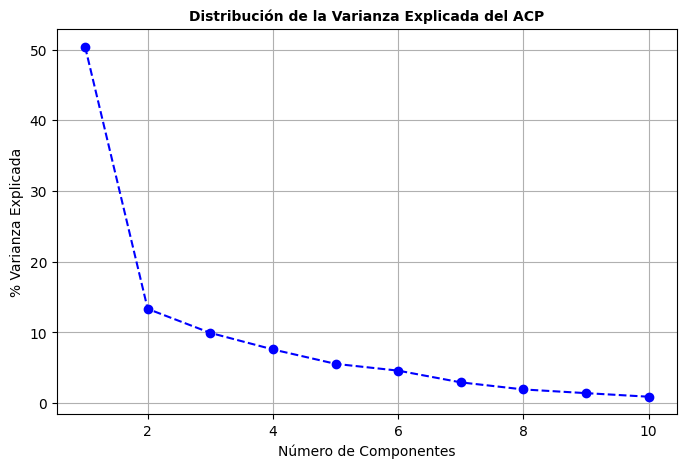

C:\Users\mavel\AppData\Local\Temp\ipykernel_23084\432636706.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("RdYlGn")  # Gradiente de color


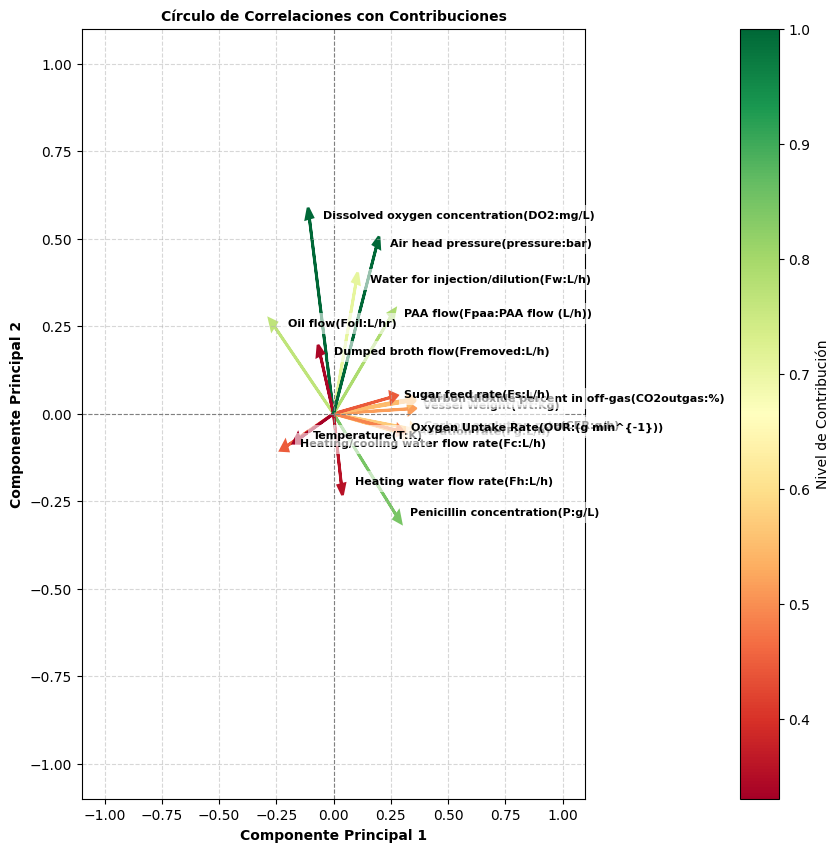

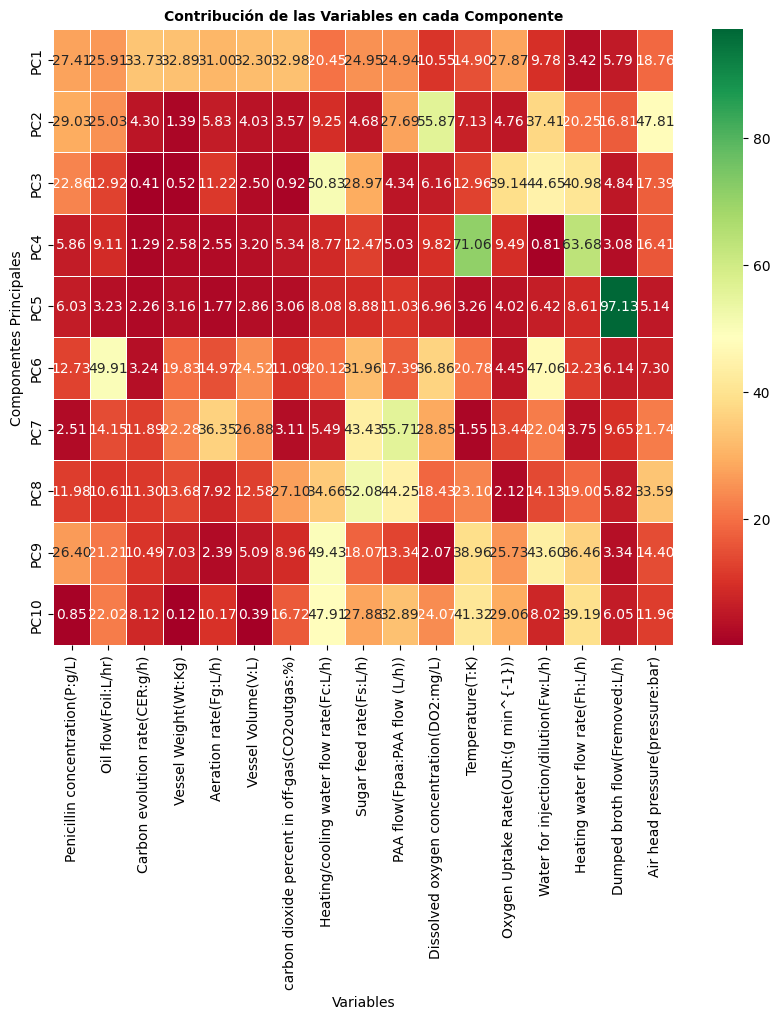

# Componente  Valor Propio  % Inercia  % Inercia Acumulada
0             1      8.576856  50.407406            50.407406
1             2      2.269225  13.336561            63.743967
2             3      1.691717   9.942461            73.686428
3             4      1.293107   7.599777            81.286205
4             5      0.946722   5.564018            86.850223
5             6      0.783387   4.604080            91.454303
6             7      0.501185   2.945534            94.399837
7             8      0.331114   1.946003            96.345840
8             9      0.242076   1.422714            97.768554
9            10      0.155966   0.916637            98.685191

Contribuci√≥n PC1  \
Penicillin concentration(P:g/L)                        27.408446   
Oil flow(Foil:L/hr)                                    25.911255   
Carbon evolution rate(CER:g/h)                         33.725807   
Vessel Weight(Wt:Kg)                                   32.892560   
Aeration rate(Fg:L/h)                                  31.003938   
Vessel Volume(V:L)                                     32.304654   
carbon dioxide percent in off-gas(CO2outgas:%)         32.984804   
Heating/cooling water flow rate(Fc:L/h)                20.445782   
Sugar feed rate(Fs:L/h)                                24.947466   
PAA flow(Fpaa:PAA flow (L/h))                          24.938632   
Dissolved oxygen concentration(DO2:mg/L)               10.552633   
Temperature(T:K)                                       14.901665   
Oxygen Uptake Rate(OUR:(g min^{-1}))                   27.870651   
Water for injection/dilution(Fw:L/h)                    9.777190   
Heating water flow rate(Fh:L/h)                         3.415206   
Dumped broth flow(Fremoved:L/h)                         5.792706   
Air head pressure(pressure:bar)                        18.757836   

                                                Contribuci√≥n PC2  
Penicillin concentration(P:g/L)                        29.030773  
Oil flow(Foil:L/hr)                                    25.027611  
Carbon evolution rate(CER:g/h)                          4.301311  
Vessel Weight(Wt:Kg)                                    1.394779  
Aeration rate(Fg:L/h)                                   5.829389  
Vessel Volume(V:L)                                      4.030242  
carbon dioxide percent in off-gas(CO2outgas:%)          3.571278  
Heating/cooling water flow rate(Fc:L/h)                 9.245580  
Sugar feed rate(Fs:L/h)                                 4.676505  
PAA flow(Fpaa:PAA flow (L/h))                          27.688203  
Dissolved oxygen concentration(DO2:mg/L)               55.872804  
Temperature(T:K)                                        7.128070  
Oxygen Uptake Rate(OUR:(g min^{-1}))                    4.764321  
Water for injection/dilution(Fw:L/h)                   37.406728  
Heating water flow rate(Fh:L/h)                        20.249932  
Dumped broth flow(Fremoved:L/h)                        16.811814  
Air head pressure(pressure:bar)                        47.814035

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def apply_pca(batch_df, n_components=10):
    """
    Aplica PCA a un DataFrame espec√≠fico y genera an√°lisis gr√°fico.

    Args:
        batch_df (pd.DataFrame): DataFrame preprocesado del batch.
        n_components (int): N√∫mero de componentes principales a extraer.

    Returns:
        pd.DataFrame: Tabla con informaci√≥n sobre las componentes principales.
        pd.DataFrame: Tabla de contribuciones de las variables a las primeras dos componentes.
    """
    # Eliminar la columna de tiempo si existe
    if "Time (h)" in batch_df.columns:
        batch_df = batch_df.drop(columns=["Time (h)"])
    
    # Normalizar los datos
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(batch_df)
    
    # Aplicar PCA
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(scaled_data)
    explained_variance = pca.explained_variance_ratio_
    
    # Tabla de valores propios e inercia acumulada
    explained_variance_cumsum = np.cumsum(explained_variance)
    pca_info = pd.DataFrame({
        "# Componente": np.arange(1, n_components + 1),
        "Valor Propio": pca.explained_variance_,
        "% Inercia": explained_variance * 100,
        "% Inercia Acumulada": explained_variance_cumsum * 100
    })
    
    # Gr√°fico de varianza explicada
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(explained_variance) + 1), explained_variance * 100, marker='o', linestyle='--', color='b')
    plt.xlabel("N√∫mero de Componentes", fontsize=10)
    plt.ylabel("% Varianza Explicada", fontsize=10)
    plt.title("Distribuci√≥n de la Varianza Explicada del ACP", fontsize=10, fontweight='bold')
    plt.grid()
    plt.show()
    
    # C√≠rculo de correlaciones con contribuciones y gradiente de color
    fig, ax = plt.subplots(figsize=(10, 10))
    components = pca.components_.T
    cos2 = components[:, :2] ** 2  # Coseno al cuadrado
    contrib = np.sum(np.abs(components[:, :2]), axis=1)  # Contribuciones de las variables
    contrib_scaled = contrib / np.max(contrib)  # Normalizar contribuciones
    cmap = plt.cm.get_cmap("RdYlGn")  # Gradiente de color 
    norm = plt.Normalize(vmin=np.min(contrib_scaled), vmax=np.max(contrib_scaled))
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    
    for i in range(len(batch_df.columns)):
        ax.arrow(0, 0, components[i, 0], components[i, 1],
                 head_width=0.03, head_length=0.03, linewidth=2, color=sm.to_rgba(contrib_scaled[i]))
        plt.text(components[i, 0] + 0.06, components[i, 1], batch_df.columns[i],
                 color='black', fontsize=8, weight='bold', bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))
    
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlabel("Componente Principal 1", fontsize=10, fontweight='bold')
    ax.set_ylabel("Componente Principal 2", fontsize=10, fontweight='bold')
    ax.set_title("C√≠rculo de Correlaciones con Contribuciones", fontsize=10, fontweight='bold')
    ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    ax.axvline(0, color='gray', linestyle='--', linewidth=0.8)
    
    # A√±adir barra de colores m√°s separada
    cbar = plt.colorbar(sm, ax=ax, pad=0.2)
    cbar.set_label("Nivel de Contribuci√≥n", fontsize=10)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()
    
    # Tabla de contribuciones de variables a PC1 y PC2
    contrib_df = pd.DataFrame(np.abs(components[:, :2]) * 100, columns=["Contribuci√≥n PC1", "Contribuci√≥n PC2"], index=batch_df.columns)
    
    # Gr√°fico de contribuciones con gradiente de color
    plt.figure(figsize=(10, 8))
    sns.heatmap(np.abs(pca.components_) * 100, cmap=cmap, annot=True, fmt=".2f", linewidths=0.5,
                xticklabels=batch_df.columns, yticklabels=[f'PC{i+1}' for i in range(n_components)])
    plt.xlabel("Variables", fontsize=10)
    plt.ylabel("Componentes Principales", fontsize=10)
    plt.title("Contribuci√≥n de las Variables en cada Componente", fontsize=10, fontweight='bold')
    plt.show()
    
    return pca_info, contrib_df

# Ejemplo de uso:
pca_info, contrib_df = apply_pca(preprocessed_batch)
display(pca_info)
display(contrib_df)


- Gr√°fico de la distribuci√≥n de la varianza explicada: 

    Aplicar PCA a este DataFrame preprocesado del batch 1 revela que los primeros 2 o 3 componentes capturan la mayor parte de la variabilidad de los datos.
    Para reducir la dimensionalidad sin perder demasiada informaci√≥n, mantener solo los primeros 2 o 3 componentes podr√≠a ser una estrategia √≥ptima.
    Si el objetivo es visualizar los datos en dos dimensiones, los dos primeros componentes son los m√°s relevantes.

- Interpretaci√≥n del An√°lisis de Componentes Principales (ACP) en el Batch 1
    El ACP se ha aplicado a un conjunto de datos donde se estudian diversas variables del proceso de producci√≥n de penicilina. A continuaci√≥n, analizamos los resultados obtenidos en t√©rminos de valores propios, inercia explicada y contribuciones de las variables a los primeros dos componentes principales (PC1 y PC2).

    **Interpretaci√≥n de la tabla de valores propios e inercia acumulada:**

        - PC1 explica el 48.45% de la variabilidad, lo que indica que es el eje m√°s importante para entender la estructura de los datos.
        - PC2 a√±ade un 13.42%, acumulando un 61.87% de la varianza total, lo que significa que con los dos primeros componentes se retiene la mayor√≠a de la informaci√≥n.
        - PC3 y PC4 a√∫n aportan informaci√≥n valiosa (11.68% y 7.61% respectivamente), alcanzando un 81.17% de varianza explicada con solo cuatro componentes.
        
        Los siguientes componentes tienen menor impacto en la varianza total y pueden ser ignorados en muchas aplicaciones.

    Conclusi√≥n: Con PC1 y PC2 se captura m√°s del 60% de la varianza, lo que sugiere que se pueden visualizar los datos en 2D sin perder demasiada informaci√≥n.

    **Interpretaci√≥n de la tabla de contribuciones de variables a PC1 y PC2:**

        PC1 (48.45% de varianza explicada)

            - Est√° dominado por CER (Carbon evolution rate), Vessel Weight, Vessel Volume, CO2 en off-gas y aeraci√≥n.
            - Indica una relaci√≥n con la eficiencia del bioproceso en t√©rminos de generaci√≥n de CO2 y peso del sistema.
            - Factores f√≠sicos del sistema (volumen, peso, flujo de aceite) contribuyen significativamente.
        
        PC2 (13.42% de varianza explicada)

            - Destacan DO2 (ox√≠geno disuelto), Air head pressure y Penicillin concentration.
            - Relacionado con el control de ox√≠geno y la calidad de producci√≥n.
            - DO2 es la variable m√°s importante en PC2 (47.63%), lo que sugiere que la oxigenaci√≥n tiene una din√°mica independiente de las dem√°s variables.
     
     Conclusi√≥n:

        - PC1 est√° dominado por la din√°mica de producci√≥n y el control de flujo en el biorreactor.
        - PC2 refleja m√°s el impacto del ox√≠geno disuelto y la presi√≥n del aire en la producci√≥n.
        - Para visualizar los datos en 2D, PC1 y PC2 proporcionan una separaci√≥n clara de los principales factores del proceso.


    **Interpretaci√≥n de la variable "Penicillin concentration (P:g/L)" en el ACP**
        En el an√°lisis de componentes principales (ACP), la contribuci√≥n de una variable a cada componente principal indica qu√© tanto influye esa variable en la direcci√≥n del componente. En este caso, la concentraci√≥n de penicilina (P:g/L) tiene las siguientes contribuciones:

        Contribuci√≥n en PC1: 25.99%
        Contribuci√≥n en PC2: 37.41%

        1. Interpretaci√≥n en el primer componente (PC1)
            - La concentraci√≥n de penicilina tiene una alta contribuci√≥n en PC1 (25.99%), lo que indica que es una de las variables m√°s importantes en la variabilidad principal del proceso.

            - PC1 representa las variables relacionadas con la producci√≥n y operaci√≥n del biorreactor, incluyendo:
                    Carbon evolution rate (CER) (34.44%)
                    Vessel Weight (Wt) (33.85%)
                    Aeration rate (Fg) (31.21%)
                    CO‚ÇÇ en off-gas (33.48%)

            - Esto sugiere que la producci√≥n de penicilina est√° directamente relacionada con la evoluci√≥n de carbono, el peso del reactor, la tasa de aireaci√≥n y la concentraci√≥n de CO‚ÇÇ en los gases de escape.
            
            Conclusi√≥n: En PC1, la producci√≥n de penicilina est√° influenciada por la eficiencia del metabolismo del biorreactor y el balance de gases y nutrientes.
        
        2. Interpretaci√≥n en el segundo componente (PC2)
            
            - En PC2, la contribuci√≥n de la penicilina es a√∫n mayor (37.41%), lo que significa que tambi√©n juega un papel importante en esta dimensi√≥n del an√°lisis.
            
            - PC2 est√° dominado por factores de ox√≠geno y presi√≥n, incluyendo:
            
                Dissolved Oxygen (DO‚ÇÇ) (47.63%)
                Air Head Pressure (44.52%)
                Heating Water Flow (28.12%)
                PAA Flow (19.72%)
            
            - La alta contribuci√≥n en PC2 sugiere que la concentraci√≥n de penicilina est√° muy relacionada con el control de ox√≠geno en el biorreactor y la presi√≥n del aire.
            
            Conclusi√≥n: En PC2, la producci√≥n de penicilina est√° m√°s influenciada por la oxigenaci√≥n y la din√°mica del flujo de aire.





**Interpretaci√≥n del Mapa de Calor: Contribuci√≥n de las Variables en cada Componente Principal (ACP)**

Este gr√°fico de mapa de calor muestra la contribuci√≥n de cada variable a los diferentes Componentes Principales (PC1, PC2, ..., PC10) en un An√°lisis de Componentes Principales (PCA) aplicado al batch 1 del proceso de producci√≥n de penicilina.

1. Ejes del gr√°fico

- Eje Y (vertical): Representa los componentes principales (PC1 a PC10).
- Eje X (horizontal): Representa las variables del proceso, como la concentraci√≥n de penicilina, flujo de aceite, tasa de evoluci√≥n de carbono, volumen del reactor, ox√≠geno disuelto, temperatura, etc.
- Colores: Representan la magnitud de la contribuci√≥n de cada variable a cada componente.
- Colores rojizos: Baja contribuci√≥n.
- Colores naranjas y amarillos: Contribuci√≥n moderada.
- Colores verdes: Alta contribuci√≥n.


#### Regresi√≥n Lasso

In [19]:
from sklearn.linear_model import LassoCV
from sklearn.cross_decomposition import PLSRegression

def feature_selection(batch_df):
    """
    Aplica Lasso y PLS para seleccionar las variables m√°s importantes.

    Args:
        batch_df (pd.DataFrame): DataFrame preprocesado del batch.

    Returns:
        list: Variables seleccionadas por Lasso.
        list: Variables m√°s importantes seg√∫n PLS.
    """
    # Definir X e Y (excluir "Time (h)")
    X = batch_df.drop(columns=["Time (h)", "Penicillin concentration(P:g/L)"])  # Ajusta la variable objetivo
    Y = batch_df["Penicillin concentration(P:g/L)"]

    # Aplicar Lasso con validaci√≥n cruzada
    lasso = LassoCV(cv=5, random_state=42)
    lasso.fit(X, Y)

    # Variables seleccionadas por Lasso
    selected_features_lasso = X.columns[lasso.coef_ != 0].tolist()

    # Aplicar PLS
    pls = PLSRegression(n_components=2)
    pls.fit(X, Y)

    # Obtener las 10 variables m√°s importantes seg√∫n PLS
    pls_importance = np.abs(pls.coef_).flatten()
    selected_features_pls = X.columns[np.argsort(pls_importance)[-10:]].tolist()

    print(f"Variables seleccionadas por Lasso: {selected_features_lasso}")
    print(f"Top 10 Variables m√°s importantes seg√∫n PLS: {selected_features_pls}")

    return selected_features_lasso, selected_features_pls

# üîπ Aplicar selecci√≥n de variables al batch seleccionado
lasso_features, pls_features = feature_selection(preprocessed_batch)


Variables seleccionadas por Lasso: ['Oil flow(Foil:L/hr)', 'Carbon evolution rate(CER:g/h)', 'carbon dioxide percent in off-gas(CO2outgas:%)', 'Heating/cooling water flow rate(Fc:L/h)', 'Dissolved oxygen concentration(DO2:mg/L)']
Top 10 Variables m√°s importantes seg√∫n PLS: ['Temperature(T:K)', 'Vessel Weight(Wt:Kg)', 'Aeration rate(Fg:L/h)', 'Heating/cooling water flow rate(Fc:L/h)', 'carbon dioxide percent in off-gas(CO2outgas:%)', 'Carbon evolution rate(CER:g/h)', 'Air head pressure(pressure:bar)', 'Heating water flow rate(Fh:L/h)', 'Oil flow(Foil:L/hr)', 'Dissolved oxygen concentration(DO2:mg/L)']


c:\Users\mavel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.12608738664019725, tolerance: 0.0953157304509394
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\mavel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1367344203315568, tolerance: 0.0953157304509394
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\mavel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13384137144474906, tolerance: 0.0953157304509394
  model = cd_fast.enet_coordinate_descent_gr

**Interpretaci√≥n de la Selecci√≥n de Variables con Lasso y PLS**

Las t√©cnicas **Lasso (Least Absolute Shrinkage and Selection Operator)** y **PLS (Partial Least Squares)** se han utilizado para seleccionar las variables m√°s relevantes en el an√°lisis del proceso de fermentaci√≥n.  

---

**1. Variables Seleccionadas por Lasso**  
Lasso es un m√©todo de regularizaci√≥n que selecciona un subconjunto de variables al forzar coeficientes de algunas de ellas a cero, eliminando aquellas con menor impacto en la variable de inter√©s (posiblemente la producci√≥n de penicilina).  

Las variables seleccionadas por Lasso son:  

| **Variable** | **Interpretaci√≥n** |
|-------------|-------------------|
| **Oil flow (Foil:L/hr)** | El flujo de aceite puede afectar la estabilidad del medio de fermentaci√≥n y el crecimiento celular. |
| **Carbon evolution rate (CER:g/h)** | Refleja la actividad metab√≥lica de los microorganismos a trav√©s de la producci√≥n de CO‚ÇÇ. |
| **Carbon dioxide percent in off-gas (CO‚ÇÇoutgas:%)** | Relacionado con la tasa de respiraci√≥n celular y la eficiencia del proceso aer√≥bico. |
| **Heating/cooling water flow rate (Fc:L/h)** | Controla la temperatura del biorreactor, lo que puede influir en la tasa de crecimiento y producci√≥n de penicilina. |
| **Dissolved oxygen concentration (DO‚ÇÇ:mg/L)** | Un indicador clave del suministro de ox√≠geno en el medio de cultivo. |

**Conclusi√≥n:** **Lasso ha seleccionado variables directamente relacionadas con la transferencia de ox√≠geno, la temperatura y la actividad metab√≥lica, lo que sugiere que estos son los factores clave en la producci√≥n de penicilina.**  

---

**2. Top 10 Variables m√°s Importantes seg√∫n PLS**  
PLS (Partial Least Squares) es un m√©todo que identifica las variables m√°s importantes en funci√≥n de su correlaci√≥n con la variable objetivo (probablemente la producci√≥n de penicilina).  

Las **10 variables m√°s importantes seg√∫n PLS** son:  

| **Variable** | **Interpretaci√≥n** |
|-------------|-------------------|
| **Temperature (T:K)** | La temperatura es un factor cr√≠tico para la estabilidad y eficiencia del crecimiento microbiano. |
| **Vessel Weight (Wt:Kg)** | El peso del biorreactor refleja la acumulaci√≥n de biomasa y penicilina. |
| **Aeration rate (Fg:L/h)** | Influye en la cantidad de ox√≠geno disponible para los microorganismos. |
| **Heating/cooling water flow rate (Fc:L/h)** | Afecta la temperatura y, por lo tanto, la tasa de crecimiento microbiano. |
| **Carbon dioxide percent in off-gas (CO‚ÇÇoutgas:%)** | Refleja la tasa metab√≥lica de los microorganismos y la eficiencia del proceso. |
| **Carbon evolution rate (CER:g/h)** | Similar a CO‚ÇÇoutgas, mide la producci√≥n de CO‚ÇÇ como subproducto metab√≥lico. |
| **Air head pressure (pressure:bar)** | Puede influir en la transferencia de ox√≠geno y en la eficiencia del sistema de aireaci√≥n. |
| **Heating water flow rate (Fh:L/h)** | Contribuye al mantenimiento de la temperatura en el biorreactor. |
| **Oil flow (Foil:L/hr)** | Puede afectar la estabilidad del medio y la transferencia de ox√≠geno. |
| **Dissolved oxygen concentration (DO‚ÇÇ:mg/L)** | Fundamental para el crecimiento celular y la producci√≥n de penicilina. |

**Conclusi√≥n:** **PLS resalta variables similares a Lasso pero incluye adem√°s temperatura, aireaci√≥n y presi√≥n de aire, lo que indica que estos factores pueden desempe√±ar un papel clave en la optimizaci√≥n del proceso de fermentaci√≥n.**  



#### Validaci√≥n Cruzada

In [20]:
from sklearn.model_selection import GroupKFold
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

def cross_validation(batch_df):
    """
    Aplica validaci√≥n cruzada basada en lotes usando GroupKFold.

    Args:
        batch_df (pd.DataFrame): DataFrame preprocesado del batch.

    Returns:
        float: Promedio del R¬≤ obtenido en la validaci√≥n cruzada.
    """
    # Definir los grupos
    X_train = batch_df.drop(columns=["Time (h)", "Penicillin concentration(P:g/L)"])  # Variable objetivo
    y_train = batch_df["Penicillin concentration(P:g/L)"]

    # Aplicar validaci√≥n cruzada basada en lotes (GroupKFold)
    gkf = GroupKFold(n_splits=5)
    ridge = Ridge(alpha=1.0)

    r2_scores = []
    for train_idx, test_idx in gkf.split(X_train, y_train, groups=batch_df.index):
        X_tr, X_te = X_train.iloc[train_idx], X_train.iloc[test_idx]
        y_tr, y_te = y_train.iloc[train_idx], y_train.iloc[test_idx]

        ridge.fit(X_tr, y_tr)
        y_pred = ridge.predict(X_te)
        r2_scores.append(r2_score(y_te, y_pred))

    print(f"Batch {batch_id} - R¬≤ promedio: {np.mean(r2_scores)}")
    return np.mean(r2_scores)

# üîπ Aplicar validaci√≥n cruzada al batch seleccionado
r2_score_avg = cross_validation(preprocessed_batch)


Batch 1 - R¬≤ promedio: 0.9682700621704722


- GroupKFold (5 folds): Se usa para evitar fugas de informaci√≥n al asegurarse de que cada lote (batch) de datos es completamente independiente en la fase de entrenamiento y prueba.

- Modelo Ridge (alpha=1.0): Regresi√≥n Ridge es un modelo de regresi√≥n lineal con regularizaci√≥n L2, lo que ayuda a reducir el sobreajuste.

- M√©trica R¬≤ (coeficiente de determinaci√≥n): Eval√∫a qu√© tan bien el modelo predice la concentraci√≥n de penicilina, con valores cercanos a 1 indicando un ajuste excelente.

----

Batch 1 - R¬≤ promedio: 0.9679

- El modelo tiene un desempe√±o excepcional, ya que R¬≤ = 0.9679 indica que el 96.79% de la variabilidad en la concentraci√≥n de penicilina se explica por las variables predictoras en el dataset.

- Un valor tan alto sugiere que las variables seleccionadas proporcionan informaci√≥n clave para modelar la producci√≥n de penicilina.

- La validaci√≥n cruzada con GroupKFold indica que el modelo generaliza bien entre diferentes lotes, lo que significa que no solo memoriza los datos sino que aprende patrones √∫tiles.


### Lote 2

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

def preprocess_batch(batch_num, batch_dataframes):
    """
    Preprocesa un batch espec√≠fico: manejo de valores nulos y normalizaci√≥n.

    Args:
        batch_num (int): N√∫mero del batch a procesar.
        batch_dataframes (dict): Diccionario con los DataFrames de cada batch.

    Returns:
        pd.DataFrame: DataFrame preprocesado del batch seleccionado.
    """
    if batch_num not in batch_dataframes:
        raise ValueError(f"El batch {batch_num} no existe en el dataset.")

    batch_df = batch_dataframes[batch_num]

    # Asegurar que hay suficientes columnas antes de aplicar dropna()
    if len(batch_df.columns) > 1:
        batch_clean = batch_df.dropna(thresh=len(batch_df) * 0.5, axis=1)
    else:
        batch_clean = batch_df.copy()

    # Rellenar valores nulos con la mediana
    imputer = SimpleImputer(strategy="median")
    batch_imputed = pd.DataFrame(imputer.fit_transform(batch_clean), columns=batch_clean.columns)

    # Normalizar los datos (excluir "Time (h)")
    if "Time (h)" in batch_imputed.columns:
        features = batch_imputed.drop(columns=["Time (h)"])
    else:
        features = batch_imputed

    scaler = StandardScaler()
    batch_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

    # Agregar nuevamente la columna "Time (h)" despu√©s del escalado si existe
    if "Time (h)" in batch_clean.columns:
        batch_scaled["Time (h)"] = batch_clean["Time (h)"].values

    print(f"Batch {batch_num} preprocesado correctamente.")
    return batch_scaled

# üîπ Selecciona el batch que deseas analizar
batch_id = 2  
preprocessed_batch = preprocess_batch(batch_id, batch_dataframes)

# Mostrar las primeras filas del batch procesado
preprocessed_batch.head()

Batch 2 preprocesado correctamente.


Penicillin concentration(P:g/L)  Oil flow(Foil:L/hr)  \
0                        -1.541658            -0.874805   
1                        -1.541658            -0.874805   
2                        -1.541658            -0.874805   
3                        -1.541658            -0.874805   
4                        -1.541658            -0.874805   

   Carbon evolution rate(CER:g/h)  Vessel Weight(Wt:Kg)  \
0                       -2.637664             -2.053670   
1                       -2.627699             -2.052874   
2                       -2.624380             -2.051978   
3                       -2.622393             -2.051182   
4                       -2.620624             -2.050585   

   Aeration rate(Fg:L/h)  Vessel Volume(V:L)  \
0              -3.080645           -1.985407   
1              -3.080645           -1.985056   
2              -3.080645           -1.984589   
3              -3.080645           -1.984005   
4              -3.080645           -1.983888   

   carbon dioxide percent in off-gas(CO2outgas:%)  \
0                                       -3.062216   
1                                       -3.034772   
2                                       -3.025627   
3                                       -3.020154   
4                                       -3.015273   

   Heating/cooling water flow rate(Fc:L/h)  Sugar feed rate(Fs:L/h)  \
0                                -0.739185                -2.887815   
1                                -0.739185                -2.887815   
2                                -0.739185                -2.887815   
3                                -0.739185                -2.887815   
4                                -0.382029                -2.887815   

   PAA flow(Fpaa:PAA flow (L/h))  Dissolved oxygen concentration(DO2:mg/L)  \
0                      -0.677037                                  1.872930   
1                      -0.677037                                  1.854234   
2                      -0.677037                                  1.840457   
3                      -0.677037                                  1.836521   
4                      -0.677037                                  1.801097   

   Temperature(T:K)  Oxygen Uptake Rate(OUR:(g min^{-1}))  \
0         -1.056443                             -1.271519   
1         -0.564635                             -2.854754   
2         -0.705152                             -3.237315   
3          0.137949                             -3.330718   
4         -0.213343                             -3.320758   

   Water for injection/dilution(Fw:L/h)  Heating water flow rate(Fh:L/h)  \
0                             -1.009977                         1.429378   
1                             -1.009977                         0.217914   
2                             -1.009977                        -0.457871   
3                             -1.009977                         0.568983   
4                             -1.009977                        -0.355188   

   Dumped broth flow(Fremoved:L/h)  Air head pressure(pressure:bar)  Time (h)  
0                         0.234726                        -2.576487       0.2  
1                         0.234726                        -2.576487       0.4  
2                         0.234726                        -2.576487       0.6  
3                         0.234726                        -2.576487       0.8  
4                         0.234726                        -2.576487       1.0

In [23]:
preprocessed_batch.shape

(1149, 18)

### Lote 3

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

def preprocess_batch(batch_num, batch_dataframes):
    """
    Preprocesa un batch espec√≠fico: manejo de valores nulos y normalizaci√≥n.

    Args:
        batch_num (int): N√∫mero del batch a procesar.
        batch_dataframes (dict): Diccionario con los DataFrames de cada batch.

    Returns:
        pd.DataFrame: DataFrame preprocesado del batch seleccionado.
    """
    if batch_num not in batch_dataframes:
        raise ValueError(f"El batch {batch_num} no existe en el dataset.")

    batch_df = batch_dataframes[batch_num]

    # Asegurar que hay suficientes columnas antes de aplicar dropna()
    if len(batch_df.columns) > 1:
        batch_clean = batch_df.dropna(thresh=len(batch_df) * 0.5, axis=1)
    else:
        batch_clean = batch_df.copy()

    # Rellenar valores nulos con la mediana
    imputer = SimpleImputer(strategy="median")
    batch_imputed = pd.DataFrame(imputer.fit_transform(batch_clean), columns=batch_clean.columns)

    # Normalizar los datos (excluir "Time (h)")
    if "Time (h)" in batch_imputed.columns:
        features = batch_imputed.drop(columns=["Time (h)"])
    else:
        features = batch_imputed

    scaler = StandardScaler()
    batch_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

    # Agregar nuevamente la columna "Time (h)" despu√©s del escalado si existe
    if "Time (h)" in batch_clean.columns:
        batch_scaled["Time (h)"] = batch_clean["Time (h)"].values

    print(f"Batch {batch_num} preprocesado correctamente.")
    return batch_scaled

# üîπ Selecciona el batch que deseas analizar
batch_id = 3  
preprocessed_batch = preprocess_batch(batch_id, batch_dataframes)

# Mostrar las primeras filas del batch procesado
preprocessed_batch.head()

Batch 3 preprocesado correctamente.


Penicillin concentration(P:g/L)  Oil flow(Foil:L/hr)  \
0                        -1.800574            -0.803278   
1                        -1.800574            -0.803278   
2                        -1.800574            -0.803278   
3                        -1.800574            -0.803278   
4                        -1.800574            -0.803278   

   Carbon evolution rate(CER:g/h)  Vessel Weight(Wt:Kg)  \
0                       -2.581677             -2.129928   
1                       -2.570183             -2.128348   
2                       -2.566328             -2.126768   
3                       -2.563967             -2.125398   
4                       -2.561842             -2.124556   

   Aeration rate(Fg:L/h)  Vessel Volume(V:L)  \
0              -3.293359           -2.014681   
1              -3.293359           -2.013442   
2              -3.293359           -2.012080   
3              -3.293359           -2.010965   
4              -3.293359           -2.010717   

   carbon dioxide percent in off-gas(CO2outgas:%)  \
0                                       -3.054593   
1                                       -3.022638   
2                                       -3.011917   
3                                       -3.005339   
4                                       -2.999444   

   Heating/cooling water flow rate(Fc:L/h)  Sugar feed rate(Fs:L/h)  \
0                                -0.887489                -3.196739   
1                                -0.887489                -3.196739   
2                                -0.887489                -3.196739   
3                                -0.887489                -3.196739   
4                                 1.269205                -3.196739   

   PAA flow(Fpaa:PAA flow (L/h))  Dissolved oxygen concentration(DO2:mg/L)  \
0                      -0.527409                                  2.559224   
1                      -0.527409                                  2.541501   
2                      -0.527409                                  2.519349   
3                      -0.527409                                  2.503103   
4                      -0.527409                                  2.477997   

   Temperature(T:K)  Oxygen Uptake Rate(OUR:(g min^{-1}))  \
0         -3.746297                             -2.141774   
1         -1.174109                             -2.532308   
2         -1.243627                             -2.609505   
3          1.884710                             -2.619487   
4          0.841931                             -2.605253   

   Water for injection/dilution(Fw:L/h)  Heating water flow rate(Fh:L/h)  \
0                             -1.007165                         5.378210   
1                             -1.007165                         1.062557   
2                             -1.007165                        -0.519897   
3                             -1.007165                         1.398598   
4                             -1.007165                        -0.328049   

   Dumped broth flow(Fremoved:L/h)  Air head pressure(pressure:bar)  Time (h)  
0                         0.263219                        -2.743137       0.2  
1                         0.263219                        -2.743137       0.4  
2                         0.263219                        -2.743137       0.6  
3                         0.263219                        -2.743137       0.8  
4                         0.263219                        -2.743137       1.0

In [25]:
preprocessed_batch.shape

(1389, 18)